In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

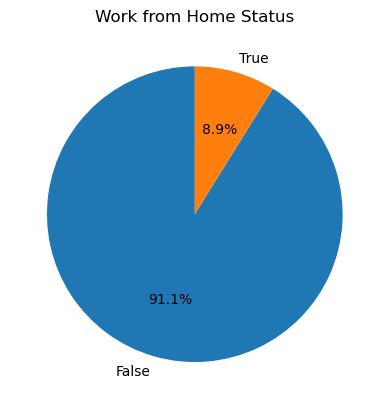

In [8]:
#Plot pie chart for work from home T/F
df['job_work_from_home'].value_counts().plot(kind='pie', startangle = 90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel("")
plt.show()

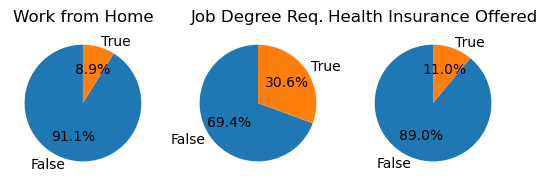

In [17]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home':'Work from Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels =['False', 'True'])
    ax[i].set_title(title)
    
plt.show()

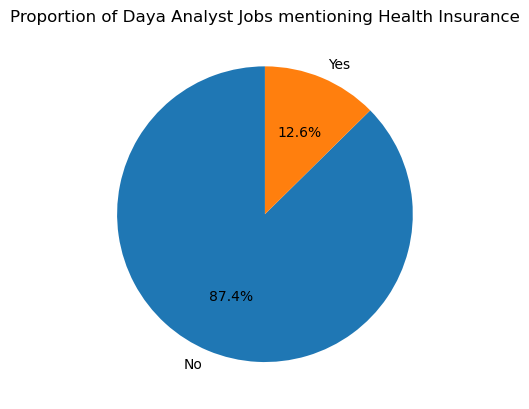

In [21]:
#Health Insurance Pie Chart

#Create a new DataFrame called df_DA that only gets Data Analyst roles.
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

#count the number of data analyst roles that mention or not mention health insurance by using the job_health_insurance column.
#df_DA['job_health_insurance'].value_counts()

#Plot this using plt.pie(), setting labels parameter to ['No', 'Yes'], startangle to 90, and format values to display similarly to 23.1%.
plt.pie(df_DA['job_health_insurance'].value_counts(), startangle = 90, autopct='%1.1f%%', labels= ['No', 'Yes'])
plt.title('Proportion of Daya Analyst Jobs mentioning Health Insurance')
plt.show()

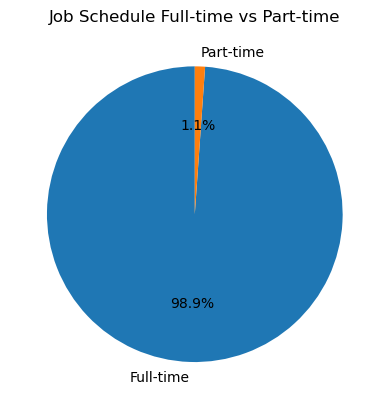

In [29]:
#Job Schedule Distribution
#Create a pie chart showing the count of job postings per job schedule types (for only jobs that are either 'Full-time' and 'Part-time') in the DataFrame.

#Create a DataFrame to filter out these job_schedule_type called df_ft_pt.
df_ft_pt = df[(df['job_schedule_type'] == 'Full-time') | (df['job_schedule_type'] =='Part-time')].copy()

plt.pie(df_ft_pt['job_schedule_type'].value_counts(), startangle = 90, autopct= '%1.1f%%', labels = ['Full-time', 'Part-time'])
plt.title('Job Schedule Full-time vs Part-time')
plt.show()

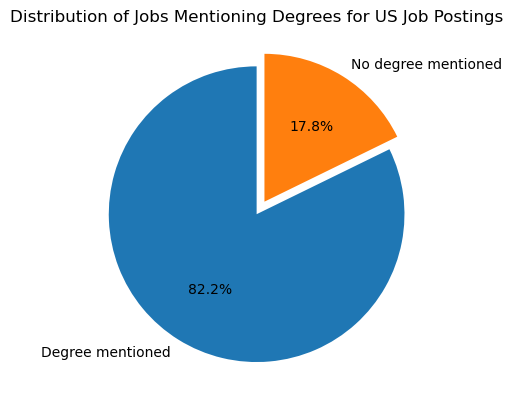

In [34]:
#Degree mentioned Pie Chart
#Create a pie chart to show the distribution of job postings that mention a degree in the job posting versus those that do not.

#Only get job postings located in the US, create a new DataFrame with this filtered data called df_US.
df_US = df[df['job_country'] == 'United States'].copy()
plt.pie(df_US['job_no_degree_mention'].value_counts(), explode=(0,0.1), startangle = 90, autopct= '%1.1f%%', labels = ['Degree mentioned', 'No degree mentioned'])
plt.title('Distribution of Jobs Mentioning Degrees for US Job Postings')
plt.show()